In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import torch
from torch import nn

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
features=np.random.randn(100)
noise=np.random.random((100,))
labels=-features*80+50*features**3+4+noise*2
features=(features).reshape(len(features),1)
features=torch.Tensor(features)
labels=torch.Tensor(labels)
new_shape = (len(labels), 1)
labels = labels.view(new_shape)

In [5]:
features.shape,labels.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [21]:
##  定义model
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 50),
            nn.ReLU(),
            nn.Linear(50,1)
          
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits



In [7]:

class CustomImageDataset(Dataset):
    def __init__(self, features, labels, transform=None, target_transform=None):
        self.feature=features
        self.label=labels
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        data=self.feature[idx,:]
        label=self.label[idx]

        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        return data, label

In [8]:
training_data=CustomImageDataset(features,labels)
train_dataloader = DataLoader(training_data, batch_size=10, shuffle=True)

In [14]:
def train(dataloader, model, loss_fn, optimizer):
    loss_lst=[]

    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

 
        

        # for name  in model.parameters():
        #     print(name)

        # print("------------------------------")

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 1 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            ## 计算出整个数据的loss
    with torch.no_grad():
        out=model(features)
        final_loss=loss_fn(out,labels)
        loss_lst.append(final_loss.item())
        print(f'epoch Loss: {final_loss.item()}')
        
    return loss_lst

In [22]:
loss_fn = nn.MSELoss()
model = NeuralNetwork().to(device)
print(model)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=1, bias=True)
  )
)


In [23]:
epochs = 1000
loss_lst=[]
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    loss_lst+=train(train_dataloader, model, loss_fn, optimizer)

流式输出内容被截断，只能显示最后 5000 行内容。
loss: 13.446920  [   30/  100]
loss: 58.052105  [   40/  100]
loss: 26.114170  [   50/  100]
loss: 4.192841  [   60/  100]
loss: 9.213186  [   70/  100]
loss: 1.945109  [   80/  100]
loss: 3.434337  [   90/  100]
epoch Loss: 21.556921005249023
Epoch 617
-------------------------------
loss: 106.293114  [    0/  100]
loss: 48.499092  [   10/  100]
loss: 13.651197  [   20/  100]
loss: 3.540778  [   30/  100]
loss: 6.037742  [   40/  100]
loss: 1.397637  [   50/  100]
loss: 21.551281  [   60/  100]
loss: 13.469772  [   70/  100]
loss: 10.486904  [   80/  100]
loss: 3.620160  [   90/  100]
epoch Loss: 12.184835433959961
Epoch 618
-------------------------------
loss: 11.908392  [    0/  100]
loss: 5.849114  [   10/  100]
loss: 3.572334  [   20/  100]
loss: 30.690186  [   30/  100]
loss: 8.373446  [   40/  100]
loss: 3.891848  [   50/  100]
loss: 1.487205  [   60/  100]
loss: 3.881576  [   70/  100]
loss: 41.358829  [   80/  100]
loss: 20.329977  [   90/  100]
epo

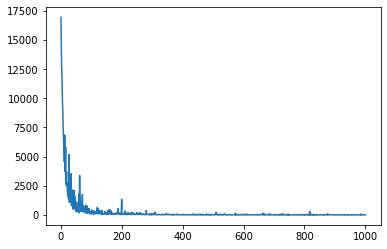

In [24]:
plt.plot(np.arange(len(loss_lst))+1,loss_lst)
plt.show()

In [25]:
out=model(features)

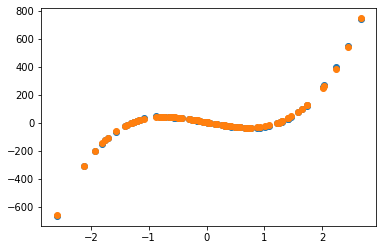

In [26]:
plt.scatter(features,out.detach().numpy())
plt.scatter(features,labels)
plt.show()